<a href="https://colab.research.google.com/github/ezequielcabeja/Imers-oAlura_DS_A1/blob/main/Imers%C3%A3o_Alura_DS_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas

# **Análise de dados com Pandas**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
#Dimensao do arquivo (linhas e colunas)
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
#Prompt: Traduza pa mim todas as colunas do dataframe df para Português

renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
#Promtp: Traduza para português as categorias da coluna "senioridade" do dataframe df.
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(traducao_senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [12]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
traducao_contrato = {
    'FT': 'Integral',
    'CT': 'Contrato',
    'PT': 'Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(traducao_contrato)

df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [14]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [15]:
traducao_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].map(traducao_remoto)

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [16]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [17]:
traducao_tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [20]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [21]:
df.describe(include="all")

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
count,133339.000000,133349,133349,133349,1.333490e+05,133349,133349.000000,133349,133349,133349,133349
unique,NaN,4,4,390,NaN,26,NaN,102,3,95,3
top,NaN,Senior,Integral,Data Scientist,NaN,USD,NaN,US,Presencial,US,Média
freq,NaN,77241,132563,17314,NaN,126140,NaN,119579,105312,119641,129561
mean,2024.358770,NaN,NaN,NaN,1.632833e+05,NaN,157617.272098,NaN,NaN,NaN,NaN
std,0.680627,NaN,NaN,NaN,2.173860e+05,NaN,74288.363097,NaN,NaN,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,NaN,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.060200e+05,NaN,106000.000000,NaN,NaN,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.470000e+05,NaN,146206.000000,NaN,NaN,NaN,NaN
75%,2025.000000,NaN,NaN,NaN,1.990000e+05,NaN,198000.000000,NaN,NaN,NaN,NaN


# **Preparação e limpeza dos Dados**

PRINT

In [22]:
#Verificar dados Faltantes (se ha valores nulos)
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
#Buscando total de todos os valores faltantes das respectivas features(em colunas)
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [24]:
#Verificando quais valor fazem parte do atributo "ano", os valores unicos
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
#Exibindo as linhas que possuem esses elementos faltantes/nulos(NaNs)
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [26]:
#Preenchimento de dados em faltas com valores medios. Usando um outro exempo
#Criacao de DataFrame de teste
df_salarios = pd.DataFrame(
    {
    "nome": ["Ana", "Bruno", "Carlos", "Daniel", "Val"],
    "salario": [4000, np.nan, 5000, np.nan, 100000]
    })
df_salarios["salario_media"]=df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))
#Em caso de outliers, podemos usar a mediana, ja que esta sofre pouco impacto do mesmo.
df_salarios["salario_mediana"]=df_salarios["salario"].fillna(df_salarios["salario"].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniel,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [27]:
#Preenchendo os valores faltantes com os valores anteriores existentes
df_temperaturas = pd.DataFrame({
    "Dia":["segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
#Preenchendo os valores faltantes com os valores posteriores existentes
df_temperaturas = pd.DataFrame({
    "Dia":["segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

df_temperaturas["Preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,Preenchido_bfill
0,segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:
df_cidades = pd.DataFrame({
    "nome": ["Ana", "Bruno", "Carlos", "Daniel", "Val"],
    "cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_Preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_Preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniel,NaN,Não informado
4,Val,Belém,Belém


In [30]:
#Agora podemos  voltar o tratamento dos nossos dados originais.
#Por serem dados elevados, vamos excluir os dados faltante, usando sua subdataframe.
df_limpo = df.dropna()

In [31]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [32]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [33]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# **Visualizção de Dados**

MATPLOTLIB

In [36]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

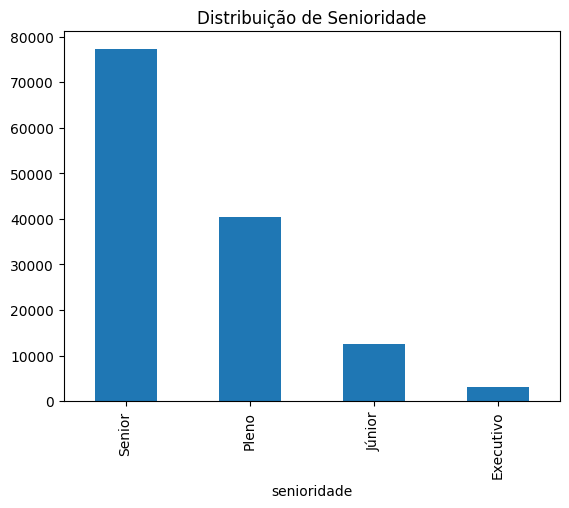

In [38]:
#Plotar um grafico com a biblioteca Pandas
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de Senioridade")

In [39]:
#Importando bibliotecas para visualizações gráficas(e ferramentas), começando por "seaborn".
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

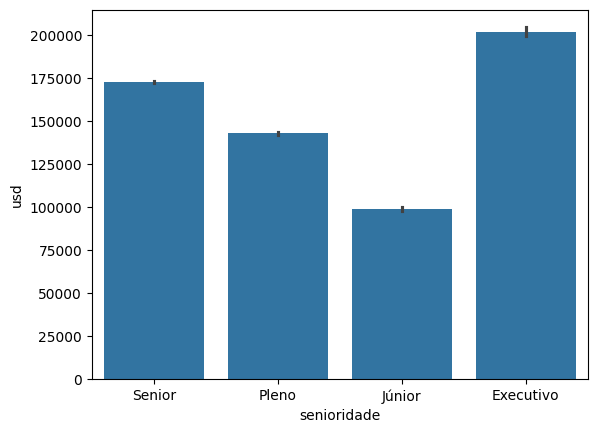

In [42]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [43]:
#Importando bibliotecas para visualizações gráficas(e ferramentas), agora por "matplotlib".
import matplotlib.pyplot as plt

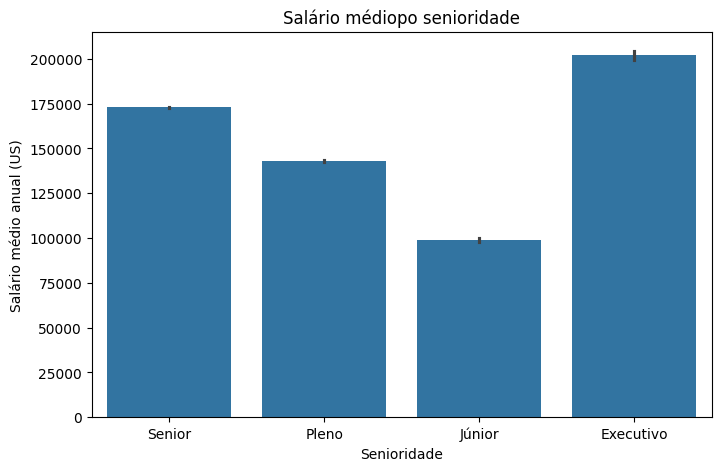

In [46]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médiopo senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (US)")

plt.show()

In [47]:
#Organizando as barras do maior para o menor.
#Agrupamento e ordenações
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [48]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

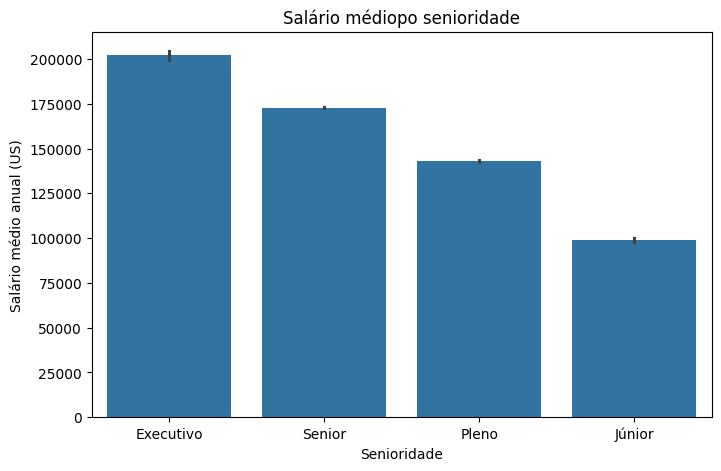

In [51]:
#Incluindo o parâmetro "order" e a variável "ordem"
plt.figure(figsize=(8, 5))

sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médiopo senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (US)")

plt.show()

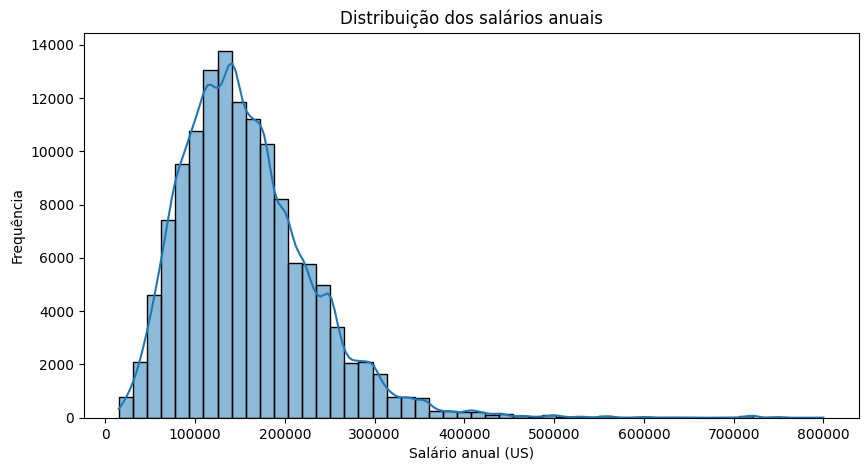

In [57]:
#Visualização da Distribuição salarial (Usando Histogramas)

plt.figure(figsize=(10, 5))

sns.histplot(df_limpo["usd"], bins=50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário anual (US)")
plt.ylabel("Frequência")

plt.show()

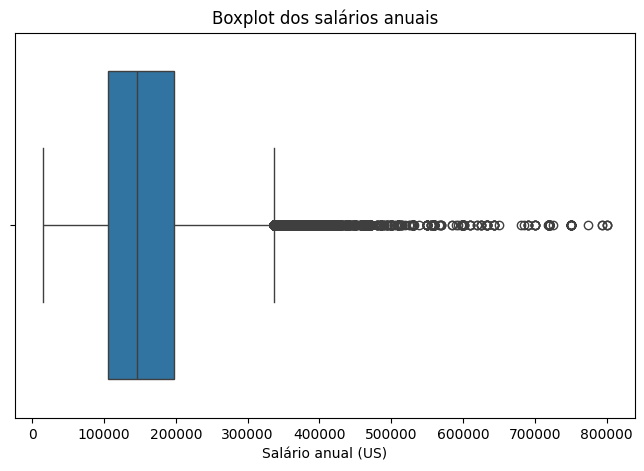

In [58]:
#Visualização da Distribuição salarial (Usando Boxplot)
plt.figure(figsize=(8, 5))

sns.boxplot(x=df_limpo["usd"])
plt.title("Boxplot dos salários anuais")
plt.xlabel("Salário anual (US)")

plt.show()

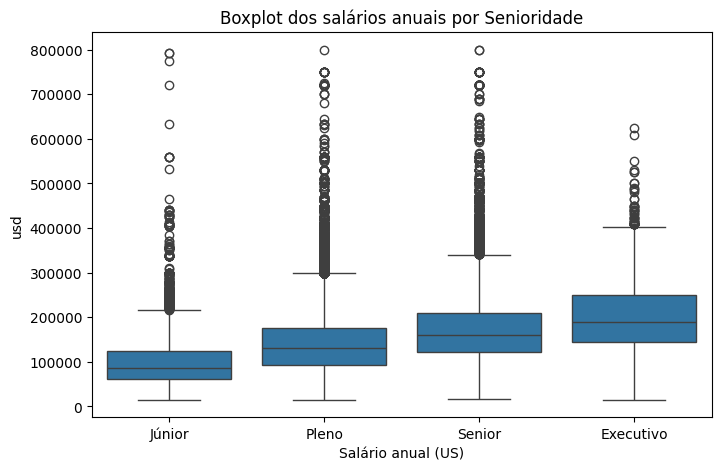

In [60]:
ordem_senioridade= ["Júnior", "Pleno", "Senior", "Executivo"]

#Visualização da Distribuição salarial (Usando Boxplot)
plt.figure(figsize=(8, 5))

sns.boxplot(x="senioridade", y="usd", data= df_limpo, order= ordem_senioridade)
plt.title("Boxplot dos salários anuais por Senioridade")
plt.xlabel("Salário anual (US)")

plt.show()

In [ ]:
#Uso de cor para as caixas

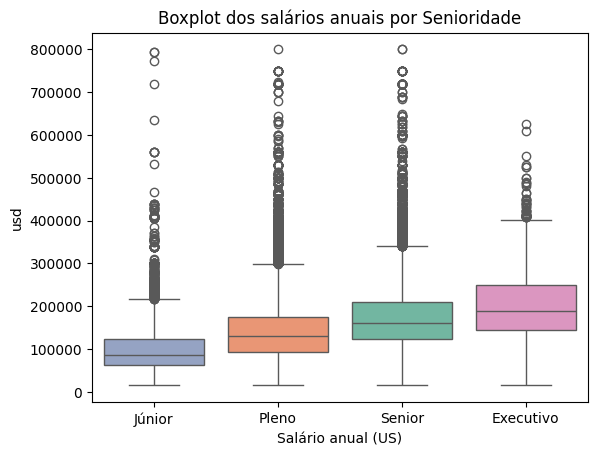

In [62]:
sns.boxplot(x="senioridade", y="usd", data= df_limpo, order= ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Boxplot dos salários anuais por Senioridade")
plt.xlabel("Salário anual (US)")

plt.show()

In [63]:
#Criação de gráficos interactivos usando a biblioteca Plotly
import plotly.express as px

In [64]:
#Prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly
senioridade_media_salario = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x="senioridade",
             y="usd",
             title="Média Salarial por Senioridade",
             labels={"senioridade": "Nível de Senioridade", "usd": "Média Salarial Anual (USD)"})
fig.show()

In [74]:
#Criando o gráfico de Pizza com 3 categorias

remoto_contagem =df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção do tipo de trabalho",)
fig.show()

In [75]:
#Criando o gráfico de Pizza com 3 categorias em Rosca

remoto_contagem =df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção do tipo de trabalho",
             hole=0.5)
fig.show()

In [76]:
#Criando o gráfico de Pizza com 3 categorias em Rosca

remoto_contagem =df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção do tipo de trabalho",
             hole=0.5)

fig.update_traces(textinfo="percent+label")
fig.show()